In [1]:
import numpy as np
import os
import gc
import matplotlib.pyplot as plt
import plotly.express as px

import torch
import pytorch_lightning as pl
import mlflow

from model import ResNetModel, load_base
from data import ImageData, ImageDataLoaders

In [2]:
torch.hub.set_dir('./')

SRC = './dataset'
IMAGE_SRC = './dataset/102flowers/jpg'
SEGMENTATION_SRC_REMOVED = './dataset/102segmentations/segmim-removed/'
PREPROCESSED_SEGMENTATION1 = './dataset/102segmentations/preprocessed-thresh-thresh'
PREPROCESSED_SEGMENTATION2 = './dataset/102segmentations/preprocessed-thresh-thresh-close'

TRAINING_DATAFRAME = './dataset/split1/training_dataframe.csv'
VALIDATION_DATAFRAME = './dataset/split1/validation_dataframe.csv'
TESTING_DATAFRAME = './dataset/split1/testing_dataframe.csv'


In [6]:
# model_from_saved = mlflow.pytorch.load_model('./mlruns/0/13cba9661fc740c6aae4e2b1d9048fb3/artifacts/model')
# model_from_saved.device

In [7]:
# for i in model_from_saved.parameters():
#     print(i.requires_grad)
#     break

In [4]:
imagedata = ImageData(IMAGE_SRC, PREPROCESSED_SEGMENTATION2, height=256, width=300)
imagedataloaders = ImageDataLoaders(imagedata)
imagedataloaders.load_dataframes(training_dataframe_path=TRAINING_DATAFRAME,
                                 testing_dataframe_path=TESTING_DATAFRAME,
                                 validation_dataframe_path=VALIDATION_DATAFRAME)
train_loader = imagedataloaders.train_dataloader(num_workers=8)
test_loader = imagedataloaders.test_dataloader(num_workers=8)
val_loader = imagedataloaders.val_dataloader(num_workers=8)

len(imagedata), len(train_loader), len(test_loader), len(val_loader)

(7960, 2548, 1592, 1273)

In [8]:
model_from_saved = mlflow.pytorch.load_model('./mlruns/0/5a594fe9316c4922ae902297232df44f/artifacts/model')

In [11]:
batch[1].shape

torch.Size([1, 2, 256, 300])

In [26]:
test_iterator = iter(test_loader)

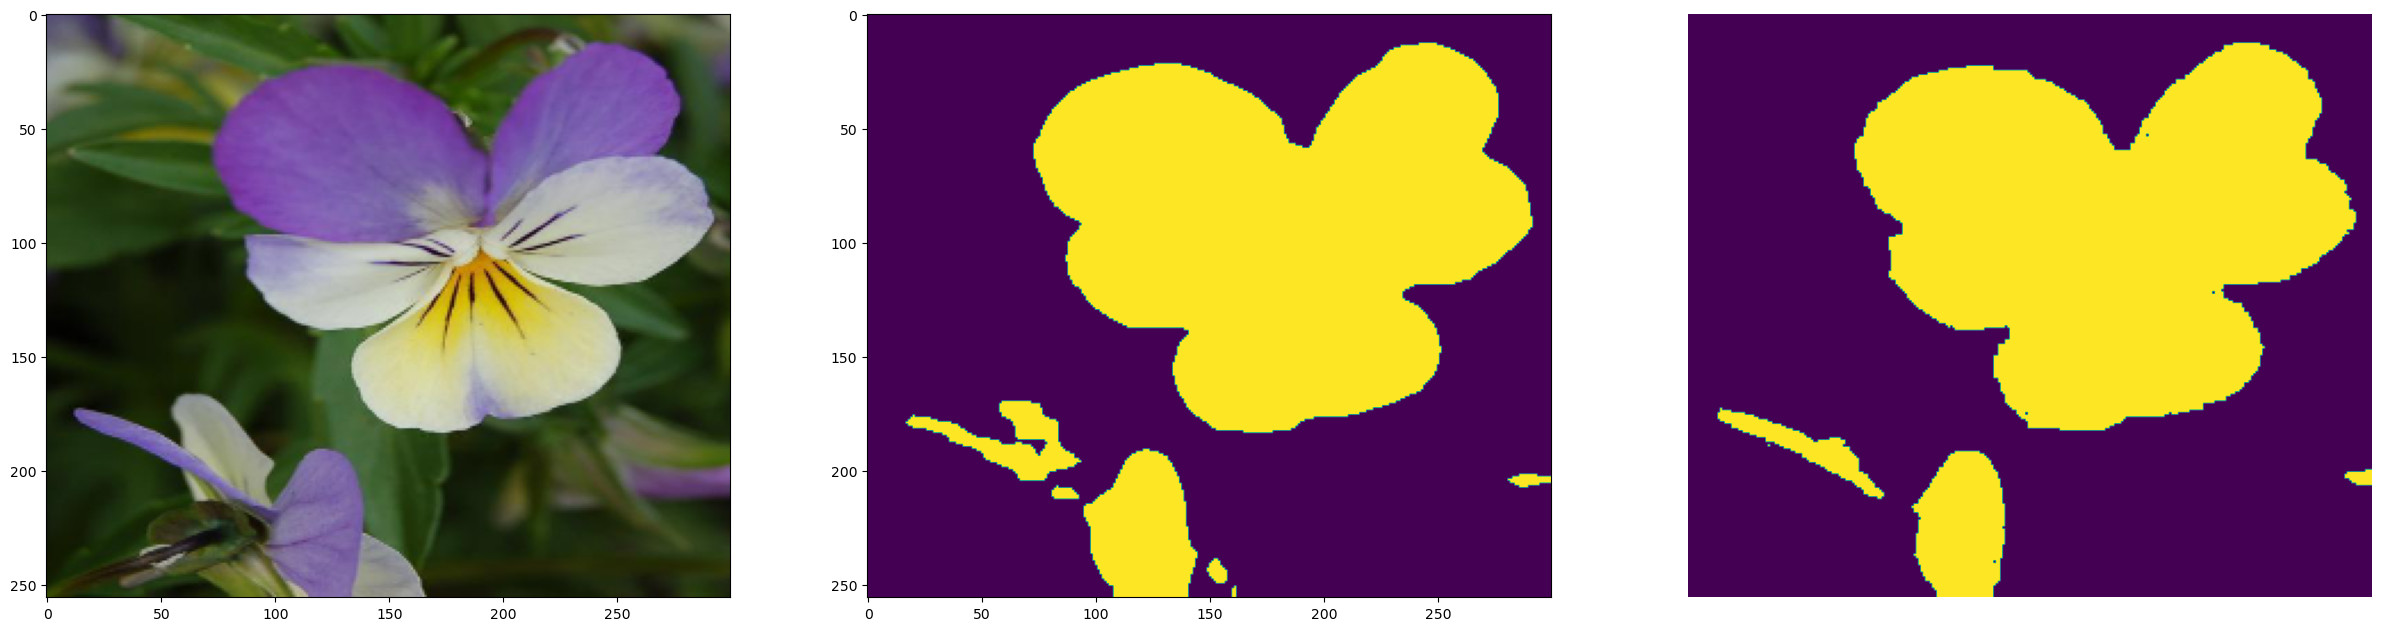

In [30]:
batch = next(test_iterator)
test_input_image = np.transpose(batch[0].numpy(), axes=[0, 2, 3, 1])
test_target_image  = np.transpose(batch[1].numpy(), axes=[0, 2, 3, 1])[0]
test_model_output = model_from_saved(batch[0]).numpy()[0]

fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax[0].imshow(test_input_image[0])
ax[1].imshow(test_model_output)
ax[2].imshow(test_target_image[:, :, 1])
plt.axis('off')
plt.show();

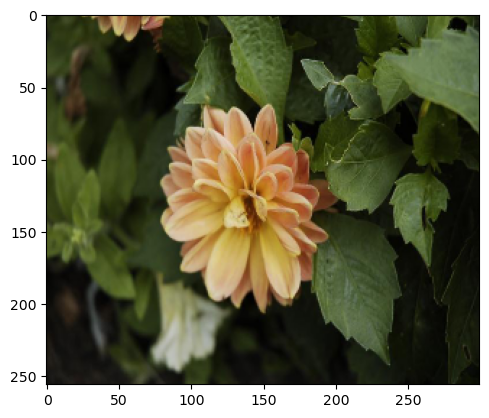

In [17]:
plt.imshow(test_input_image[0])

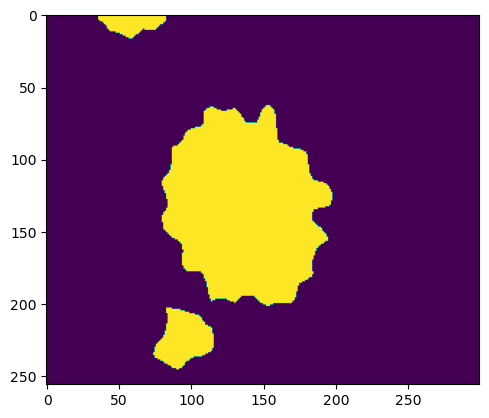

In [18]:
plt.imshow(test_model_output)

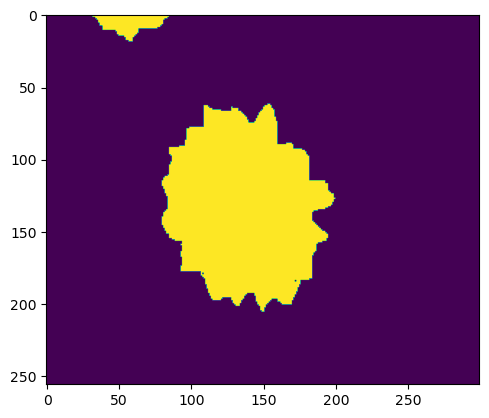

In [15]:
plt.imshow(test_target_image[:, :, 1])